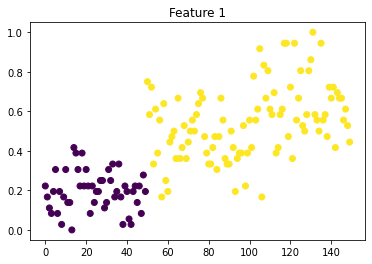

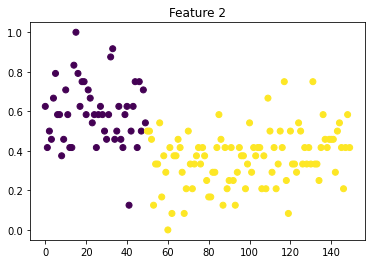

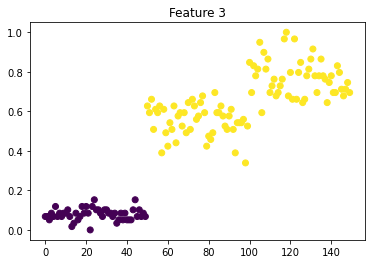

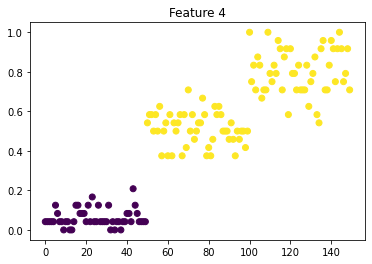

In [9]:
import pandas as pd
import cmath as math 
import numpy as np
import random
from random import randint
import matplotlib.pyplot as plt

def mean(val): 
    if len(val) == 0:
        return 0
    else:
        return (sum(val) / len(val))

def column(array, i):
    return [row[i] for row in array]

def dist(x,y):
    sum = 0
    for a in range(4):
        sum = sum + (x[a]-y[a])**2
    return (math.sqrt(sum)).real

# To calculate the distances from initialized centroids
def dist_init_centroids(data,centroid):
    dist_c1 = [0 for x in range(data.shape[0])]
    dist_c2 = [0 for x in range(data.shape[0])]
    for k in range(data.shape[0]):
        dist_c1[k] = (dist(data[k],data[centroid[0]]))
        dist_c2[k] = (dist(data[k],data[centroid[1]]))
    return dist_c1, dist_c2

# To calculate the distances from centroids
def dist_centroids(data,centrid):
    dist_c1 = [0 for x in range(len(data))]
    dist_c2 = [0 for x in range(len(data))]
    for k in range(len(data)):
        dist_c1[k] = (dist(data[k],centroid[0]))
        dist_c2[k] = (dist(data[k],centroid[1]))
    return dist_c1, dist_c2

def get_column_data(data,j):
    column = []
    for i in range(len(data)):
        column.append(data[i][j])
    return column
    
#Normalization
def normalize(data):
    normalized_data = data
    for i in range(4):
        maxval = max(get_column_data(data,i))
        minval = min(get_column_data(data,i))
        for j in range(len(data)):
            normalized_data[j][i] = (data[j][i]-minval)/(maxval-minval)
    return normalized_data

#Data
data = pd.read_excel('data2.xlsx',header=None)
data = np.array(data)
data = normalize(data)

#centroid init
random_index = [randint(0, len(data)) for b in range(2)] 
dist_c1, dist_c2 = dist_init_centroids(data,random_index)
iterations = 50

for j in range(iterations):
    # assign cluster indexes
    c_value = [1 for x in range(len(data))]
    for l in range(data.shape[0]):
        if dist_c2[l]<dist_c1[l]:
            c_value[l] = 2
    # divide into clusters using cluster indexes found above
    clist1 = []
    clist2 = []
    for m in range(data.shape[0]):
        if c_value[m] == 1:
            clist1.append(data[m])
        else:
            clist2.append(data[m])
    # update the centroids
    c1 = []
    c2 = []
    for n in range(4):
        c1.append(mean(column(clist1,n)))
        c2.append(mean(column(clist2,n)))
    centroid = [c1,c2]
    # update the distances from centroids
    dist_c1, dist_c2 = dist_centroids(data,centroid)

index = [0 for x in range(len(data))]
for i in range(len(data)):
    index[i] = i+1

plt.scatter(np.arange(len(data[:,0])),data[:,0],c=c_value)
plt.title('Feature 1')
plt.show()
plt.scatter(np.arange(len(data[:,1])),data[:,1],c=c_value)
plt.title('Feature 2')
plt.show()
plt.scatter(np.arange(len(data[:,2])),data[:,2],c=c_value)
plt.title('Feature 3')
plt.show()
plt.scatter(np.arange(len(data[:,3])),data[:,3],c=c_value)
plt.title('Feature 4')
plt.show()